# Library Imports

In [105]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import yfinance as yf
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
from textblob import TextBlob
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Data Imports

In [ ]:
bse = yf.Ticker("^BSESN")
stock_prices = bse.history(period='5y')
headlines = pd.read_csv("india-news-headlines.csv")
headlines.set_index(headlines['publish_date'], inplace = True)
headlines = headlines.drop(['headline_category', 'publish_date'], axis = 1)

In [3]:
headlines.index = pd.to_datetime(headlines.index, format = '%Y%m%d')
stock_prices.index = pd.to_datetime(stock_prices.index, format = '%Y-%m-%d')
stock_prices.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2016-07-14,27857.800781,27967.769531,27763.150391,27942.109375,10500,0,0
2016-07-15,27966.140625,28048.699219,27735.869141,27836.500000,16300,0,0
2016-07-18,27920.660156,28013.500000,27697.689453,27746.660156,20500,0,0
2016-07-19,27790.050781,27826.689453,27637.980469,27787.619141,16800,0,0
2016-07-20,27775.699219,27935.179688,27759.710938,27915.890625,12500,0,0


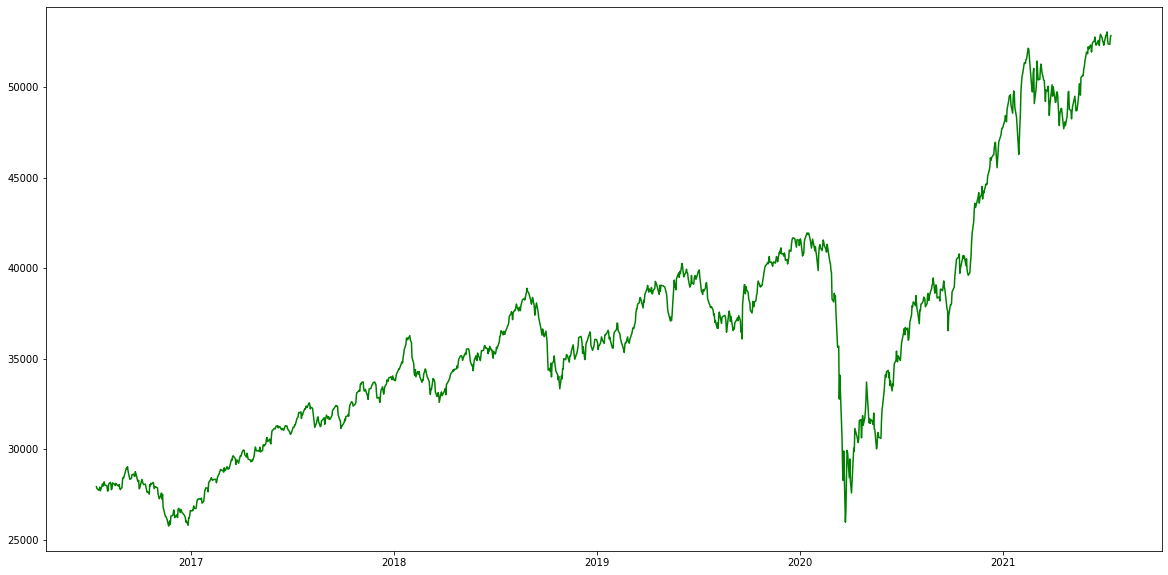

In [4]:
plt.figure(figsize = (20, 10))
plt.plot(stock_prices['Close'], color = 'g')

In [5]:
headlines.head()

,headline_text
publish_date,
2001-01-02,Status quo will not be disturbed at Ayodhya; s...
2001-01-02,Fissures in Hurriyat over Pak visit
2001-01-02,America's unwanted heading for India?
2001-01-02,For bigwigs; it is destination Goa
2001-01-02,Extra buses to clear tourist traffic


In [6]:
stock_prices = stock_prices.drop(['Dividends', 'Stock Splits'], axis = 1)
stock_prices.head()

,Open,High,Low,Close,Volume
Date,,,,,
2016-07-14,27857.800781,27967.769531,27763.150391,27942.109375,10500
2016-07-15,27966.140625,28048.699219,27735.869141,27836.500000,16300
2016-07-18,27920.660156,28013.500000,27697.689453,27746.660156,20500
2016-07-19,27790.050781,27826.689453,27637.980469,27787.619141,16800
2016-07-20,27775.699219,27935.179688,27759.710938,27915.890625,12500


<AxesSubplot:ylabel='Date'>

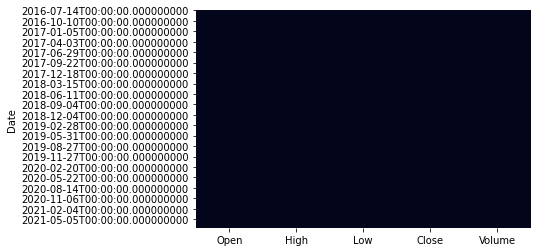

In [7]:
#Checking For NULL values
sns.heatmap(stock_prices.isnull(), cbar = False)

In [8]:
headlines.head(3)

,headline_text
publish_date,
2001-01-02,Status quo will not be disturbed at Ayodhya; s...
2001-01-02,Fissures in Hurriyat over Pak visit
2001-01-02,America's unwanted heading for India?


In [9]:
headlines['headline_text'] = headlines.groupby(headlines.index).transform(lambda x: ' '.join(x))

In [10]:
headlines = headlines.drop_duplicates()

In [11]:
headlines['headline_text'][0]

"Status quo will not be disturbed at Ayodhya; says Vajpayee Fissures in Hurriyat over Pak visit America's unwanted heading for India? For bigwigs; it is destination Goa Extra buses to clear tourist traffic Dilute the power of transfers; says Riberio Focus shifts to teaching of Hindi IT will become compulsory in schools Move to stop freedom fighters' pension flayed Gilani claims he applied for passport 2 years ago Parivar dismisses PM's warning India; Pak exchange lists of N-plants Will Qureshi's return really help the govt? PM's tacit message: Put Ram tample on hold Text of the Prime Minister's article NCW to focus on violence against women BBC's reality TV will focus on AIIMS Jaitley firm on legal reforms Hoshangabad farmers have enough water BJP jumps into rail track conversion issue America's unwanted heading for India? State may take AP to court over Krishna This official has sued the briber Park turns temple compound as residents watch Moves afoot to evict squatters in Urban dist 

In [12]:
stock_prices.reset_index(inplace = True)
headlines.reset_index(inplace = True)

In [13]:
headlines['Date'] = headlines['publish_date']
headlines.drop('publish_date', axis = 1, inplace = True)

In [14]:
merged_data = pd.merge(stock_prices, headlines, how = 'inner', on = 'Date')

In [15]:
merged_data.head()

,Date,Open,High,Low,Close,Volume,headline_text
0,2016-07-14,27857.800781,27967.769531,27763.150391,27942.109375,10500,5 never-to-be-said things during a fight How t...
1,2016-07-15,27966.140625,28048.699219,27735.869141,27836.500000,16300,Nanna Ninna Prema Kathe is a simple love story...
2,2016-07-18,27920.660156,28013.500000,27697.689453,27746.660156,20500,Stroke at 30? Anushka opens up about rejecting...
3,2016-07-19,27790.050781,27826.689453,27637.980469,27787.619141,16800,What not to do after a fight 9 ways you can ma...
4,2016-07-20,27775.699219,27935.179688,27759.710938,27915.890625,12500,Workout tips for busy moms Healthy guide to de...


In [16]:
analyzer = SentimentIntensityAnalyzer()

In [17]:
def subjectivity(sentence):
    return TextBlob(sentence).sentiment.subjectivity
def polarity(sentence):
    return TextBlob(sentence).sentiment.polarity

In [18]:
merged_data['Subjectivity'] = merged_data['headline_text'].apply(subjectivity)
merged_data['Polarity'] = merged_data['headline_text'].apply(polarity)

In [19]:
merged_data.head()

,Date,Open,High,Low,Close,Volume,headline_text,Subjectivity,Polarity
0,2016-07-14,27857.800781,27967.769531,27763.150391,27942.109375,10500,5 never-to-be-said things during a fight How t...,0.378549,0.092411
1,2016-07-15,27966.140625,28048.699219,27735.869141,27836.500000,16300,Nanna Ninna Prema Kathe is a simple love story...,0.409111,0.059495
2,2016-07-18,27920.660156,28013.500000,27697.689453,27746.660156,20500,Stroke at 30? Anushka opens up about rejecting...,0.413482,0.103652
3,2016-07-19,27790.050781,27826.689453,27637.980469,27787.619141,16800,What not to do after a fight 9 ways you can ma...,0.451916,0.072100
4,2016-07-20,27775.699219,27935.179688,27759.710938,27915.890625,12500,Workout tips for busy moms Healthy guide to de...,0.420909,0.057244


In [20]:
sentiments = merged_data['headline_text'].apply(analyzer.polarity_scores)

In [21]:
#Calculating sentiment of headlines.
merged_data['Negative'] = [i['neg'] for i in sentiments]
merged_data['Positive'] = [i['pos'] for i in sentiments]
merged_data['Compound'] = [i['compound'] for i in sentiments]
merged_data['Neutral'] = [i['neu'] for i in sentiments]
merged_data.head()

,Date,Open,High,Low,Close,Volume,headline_text,Subjectivity,Polarity,Negative,Positive,Compound,Neutral
0,2016-07-14,27857.800781,27967.769531,27763.150391,27942.109375,10500,5 never-to-be-said things during a fight How t...,0.378549,0.092411,0.150,0.105,-0.9999,0.745
1,2016-07-15,27966.140625,28048.699219,27735.869141,27836.500000,16300,Nanna Ninna Prema Kathe is a simple love story...,0.409111,0.059495,0.168,0.107,-0.9999,0.725
2,2016-07-18,27920.660156,28013.500000,27697.689453,27746.660156,20500,Stroke at 30? Anushka opens up about rejecting...,0.413482,0.103652,0.160,0.102,-0.9999,0.738
3,2016-07-19,27790.050781,27826.689453,27637.980469,27787.619141,16800,What not to do after a fight 9 ways you can ma...,0.451916,0.072100,0.164,0.106,-0.9999,0.730
4,2016-07-20,27775.699219,27935.179688,27759.710938,27915.890625,12500,Workout tips for busy moms Healthy guide to de...,0.420909,0.057244,0.172,0.087,-1.0000,0.741


<AxesSubplot:xlabel='Neutral', ylabel='Count'>

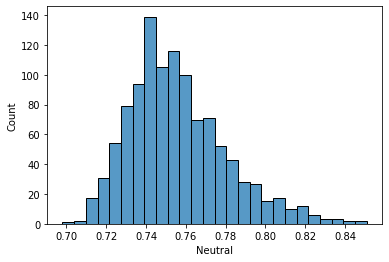

In [22]:
sns.histplot(merged_data['Neutral'])

In [142]:
final_data = merged_data[['Close', 'Polarity', 'Subjectivity', 'Negative', 'Positive', 'Neutral', 'Compound']]

In [143]:
final_data.head()

,Close,Polarity,Subjectivity,Negative,Positive,Neutral,Compound
0,27942.109375,0.092411,0.378549,0.150,0.105,0.745,-0.9999
1,27836.500000,0.059495,0.409111,0.168,0.107,0.725,-0.9999
2,27746.660156,0.103652,0.413482,0.160,0.102,0.738,-0.9999
3,27787.619141,0.072100,0.451916,0.164,0.106,0.730,-0.9999
4,27915.890625,0.057244,0.420909,0.172,0.087,0.741,-1.0000


In [144]:
def add_variation(series):
    list = []
    k1 = 0
    for i in range(0, len(series)):
        k2 = series[i]
        if k2 < k1:
            list.append(0)
        if k2 > k1:
            list.append(1)
        k1 = series[i]
    return list
Variation = pd.DataFrame(add_variation(final_data['Close']))
final_data = final_data.shift(1)

Variation = pd.concat([Variation, pd.Series([5])], ignore_index=True)
final_data['Variation'] = Variation

In [145]:
final_data = final_data.dropna()
final_data.head()

,Close,Polarity,Subjectivity,Negative,Positive,Neutral,Compound,Variation
1,27942.109375,0.092411,0.378549,0.150,0.105,0.745,-0.9999,0
2,27836.500000,0.059495,0.409111,0.168,0.107,0.725,-0.9999,0
3,27746.660156,0.103652,0.413482,0.160,0.102,0.738,-0.9999,1
4,27787.619141,0.072100,0.451916,0.164,0.106,0.730,-0.9999,1
5,27915.890625,0.057244,0.420909,0.172,0.087,0.741,-1.0000,0


In [146]:
X = final_data.drop(['Close', 'Variation'], axis = 1)
y = final_data['Variation']

In [147]:
scaler = MinMaxScaler()

In [148]:
X = scaler.fit_transform(X)

In [149]:
final_data.columns[1:-1]

Index(['Polarity', 'Subjectivity', 'Negative', 'Positive', 'Neutral',
       'Compound'],
      dtype='object')

In [150]:
X = pd.DataFrame(X, columns = final_data.columns[1:-1])

# Model training and data fitting

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=4)

In [152]:
rfr = SVC()

In [153]:
rfr.fit(X_train, y_train)

SVC()

In [154]:
predictions = rfr.predict(X_test)

In [155]:
#Confusion Matrix
classification_report(y_test, predictions)

'              precision    recall  f1-score   support\n\n           0       0.62      0.06      0.11        83\n           1       0.50      0.96      0.66        82\n\n    accuracy                           0.51       165\n   macro avg       0.56      0.51      0.39       165\nweighted avg       0.56      0.51      0.38       165\n'

## There seems to be very low correlation between our parameters and target
### I would not try to predict stock market prices using this dataset at least. Anyways, it was fun.

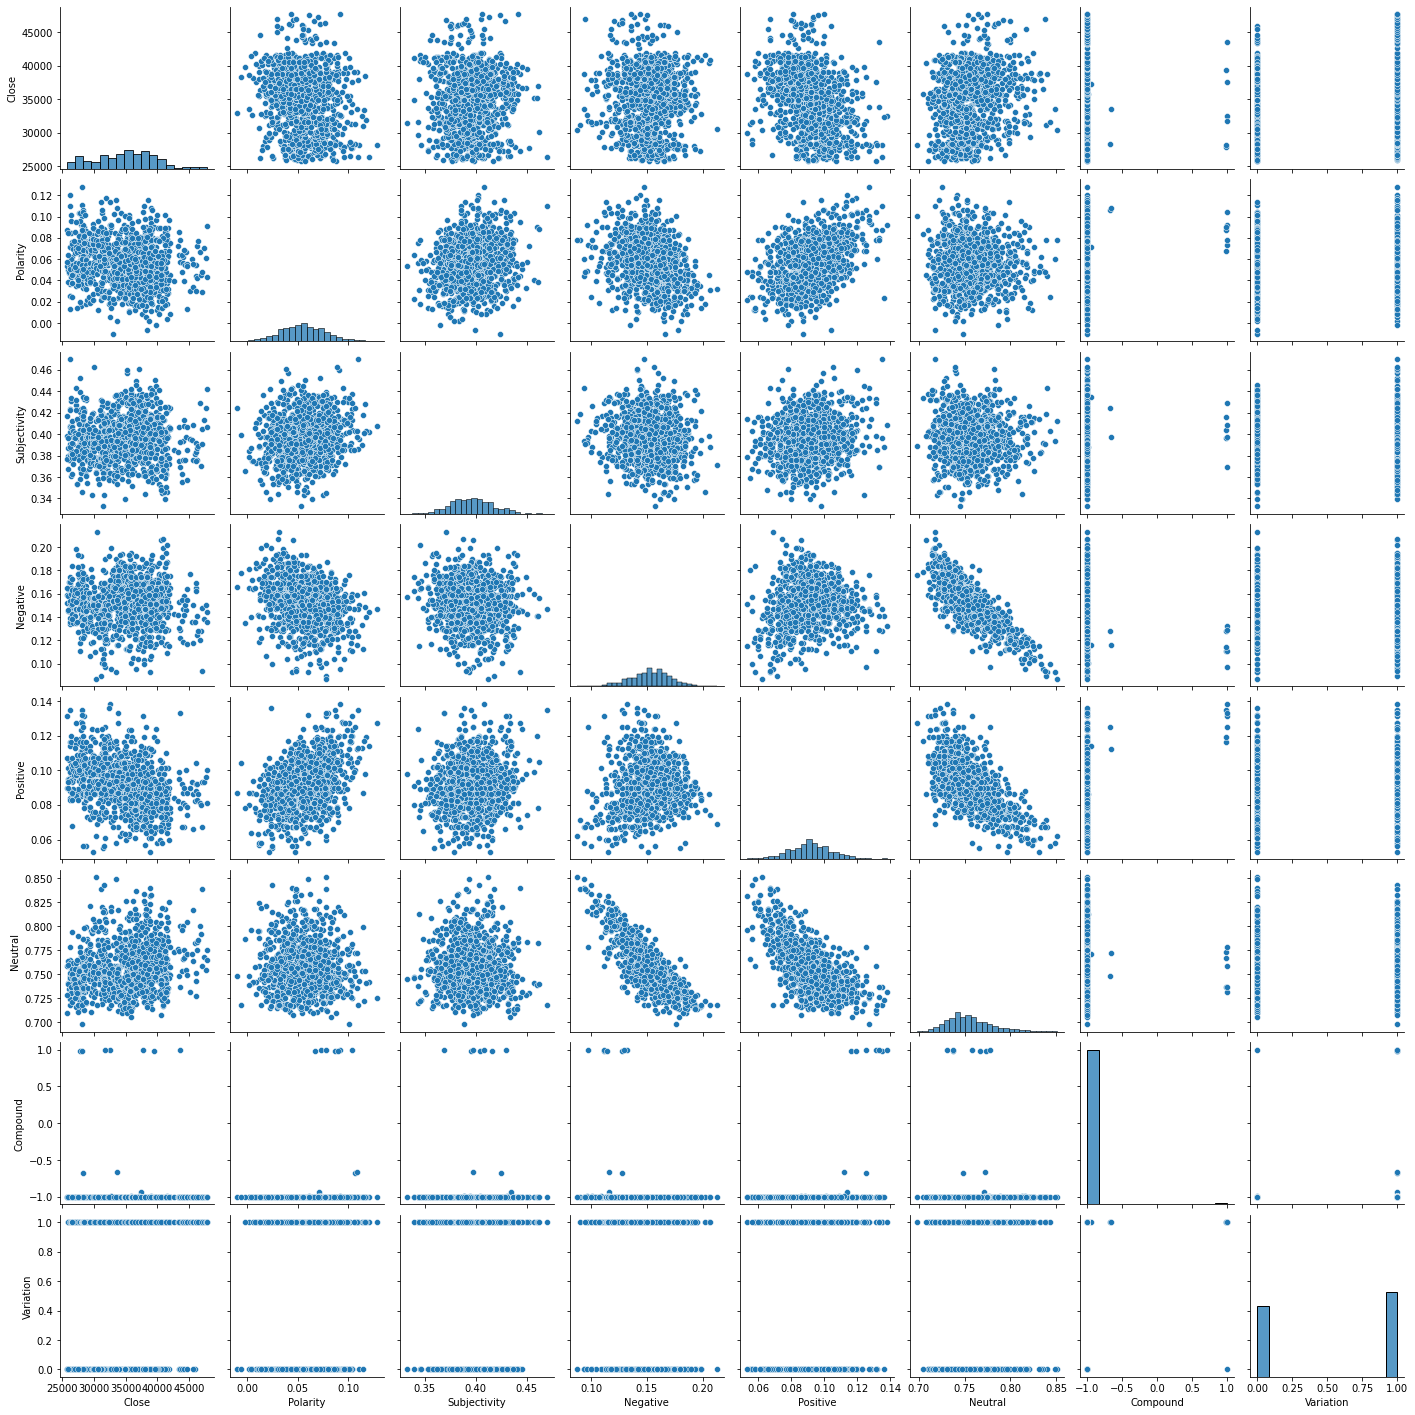

In [129]:
sns.pairplot(final_data)